In [1]:
from pyforest import*
lazy_imports()

['from pathlib import Path',
 'import gensim',
 'import sklearn',
 'import nltk',
 'import pydot',
 'from openpyxl import load_workbook',
 'import plotly as py',
 'import glob',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import numpy as np',
 'import datetime as dt',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import re',
 'import dash',
 'from sklearn import svm',
 'import plotly.graph_objs as go',
 'import awswrangler as wr',
 'from dask import dataframe as dd',
 'from sklearn.ensemble import RandomForestClassifier',
 'import plotly.express as px',
 'import pandas as pd',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import keras',
 'import spacy',
 'import pickle',
 'import bokeh',
 'import seaborn as sns',
 'import tensorflow as tf',
 'from sklearn.manifold import TSNE',
 'import sys',
 'import os',
 'from sklearn.preprocessing import OneHotEncoder',
 'import tqdm',
 'from sklearn.ensemble import RandomForestRegressor',
 'from

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Train_data=pd.read_csv("Train.csv")
Test_data=pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
 Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print('Train_data', Train_data.shape)
print('Test_data', Test_data.shape)

Train_data (8523, 12)
Test_data (5681, 11)


In [7]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
Train_data['source']="train"
Test_data['source']="test"
df=pd.concat([Train_data, Test_data], ignore_index=True)

<IPython.core.display.Javascript object>

In [11]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [12]:
df.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [13]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [14]:
df.shape

(14204, 13)

In [15]:
for i in Train_data.describe().columns:
    sns.distplot(Train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 1 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 1 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 1 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 1 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 1 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

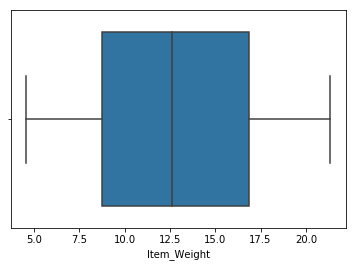

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

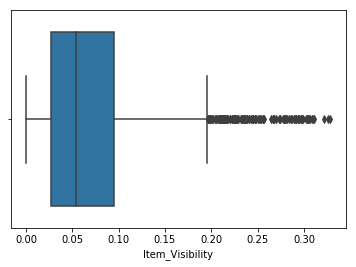

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

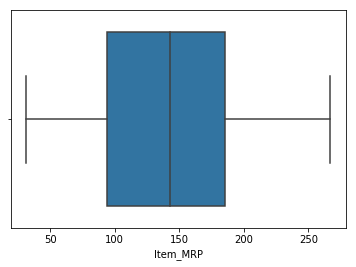

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

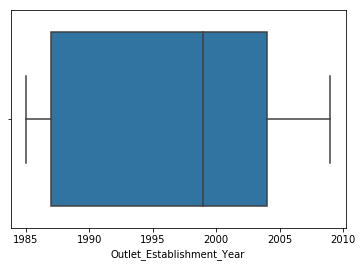

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

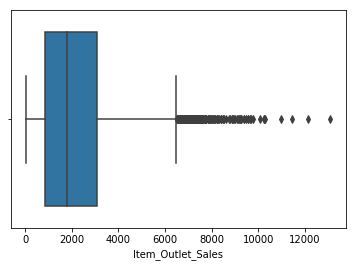

In [16]:
for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

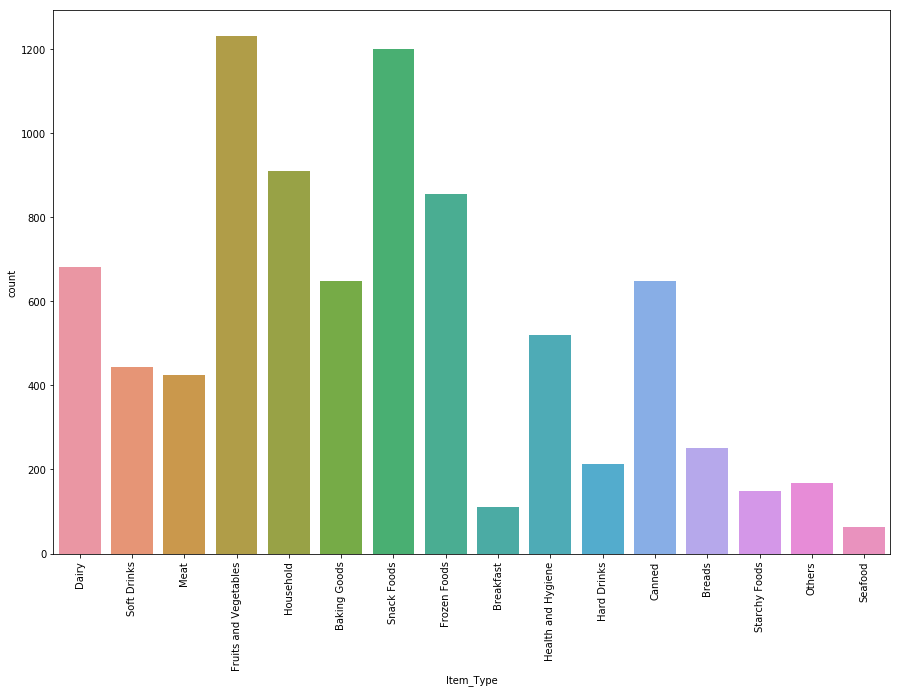

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(Train_data.Item_Type)
plt.xticks(rotation=90)

In [18]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

## Distribution of the Outlet_Size

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

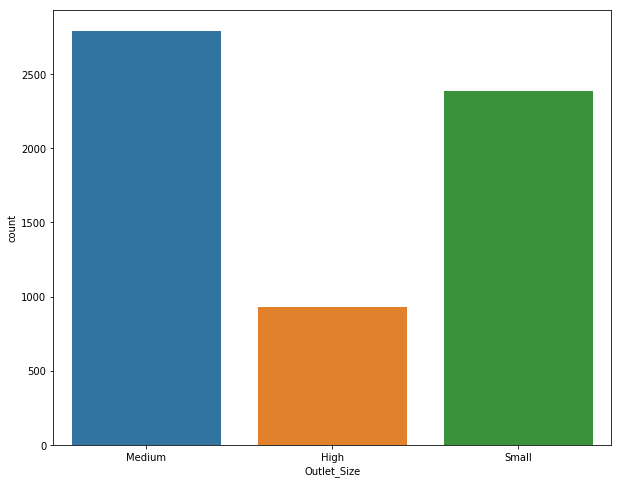

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Size)

In [20]:
Train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## Distribution of the Outlet_Location_Type

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

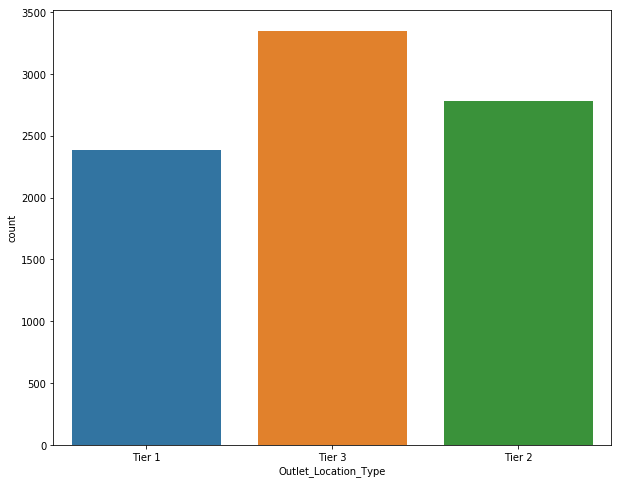

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Location_Type)

In [22]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

## Distribution of the Outlet_Type

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

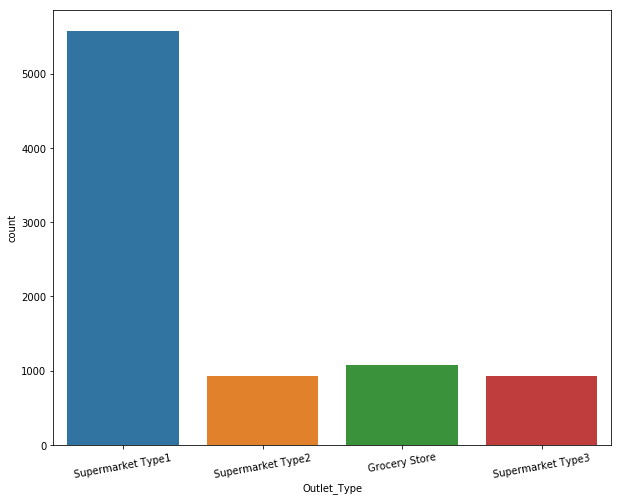

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Type)
plt.xticks(rotation=10)

In [24]:
Train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

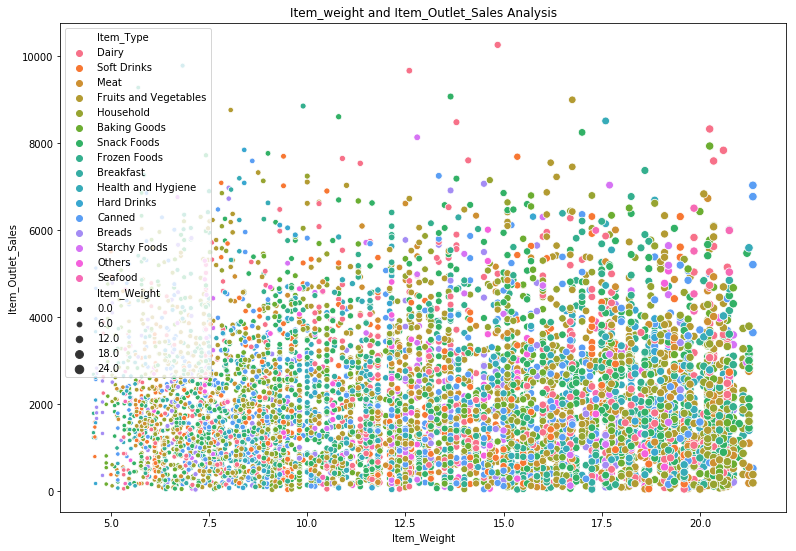

In [25]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", hue="Item_Type",size="Item_Weight", data=Train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

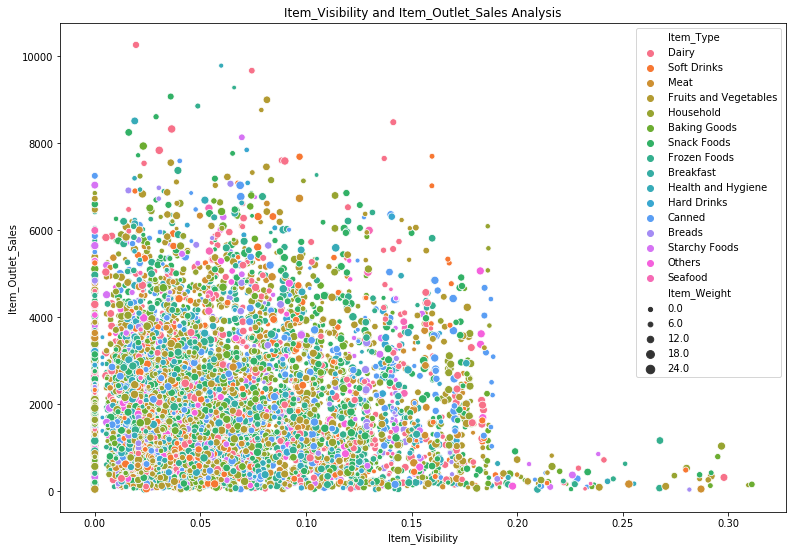

In [26]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", hue="Item_Type",size="Item_Weight", data=Train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

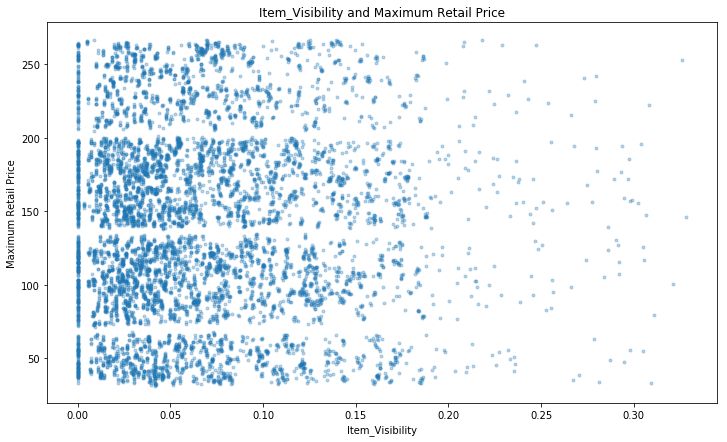

In [27]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(Train_data.Item_Visibility, Train_data.Item_MRP,".", alpha= 0.3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

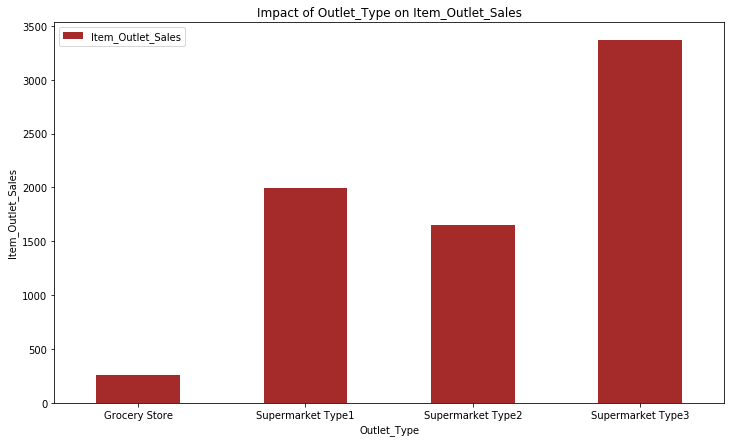

In [28]:
Outlet_Type_pivot = \
Train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='brown', figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

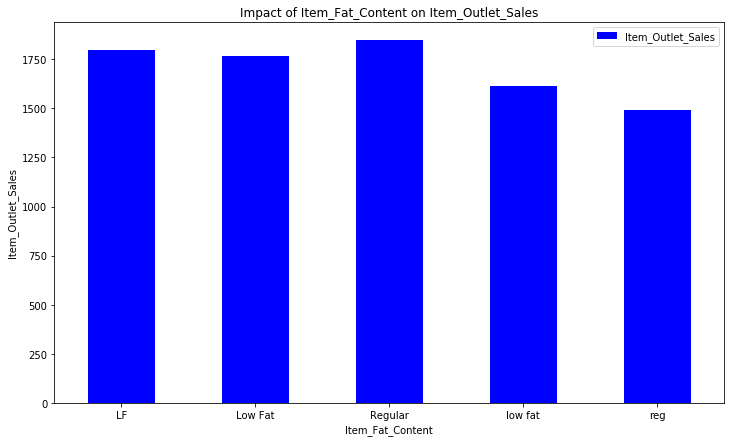

In [29]:
Item_Fat_Content_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue', figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [31]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [33]:
Train_data['Item_Fat_Content']=Train_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

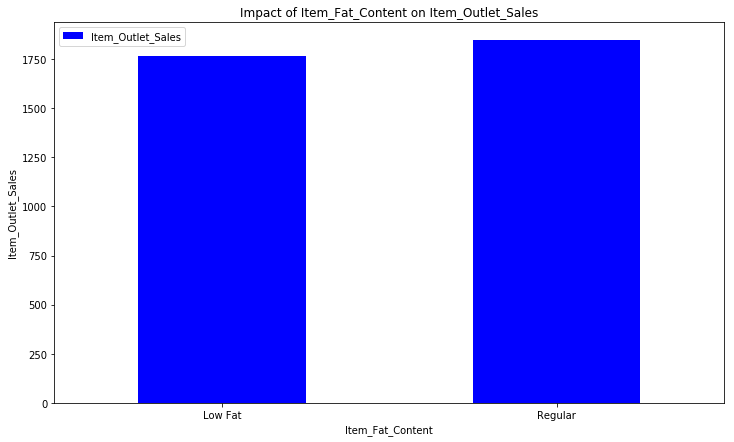

In [34]:
Item_Fat_Content_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue', figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [35]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

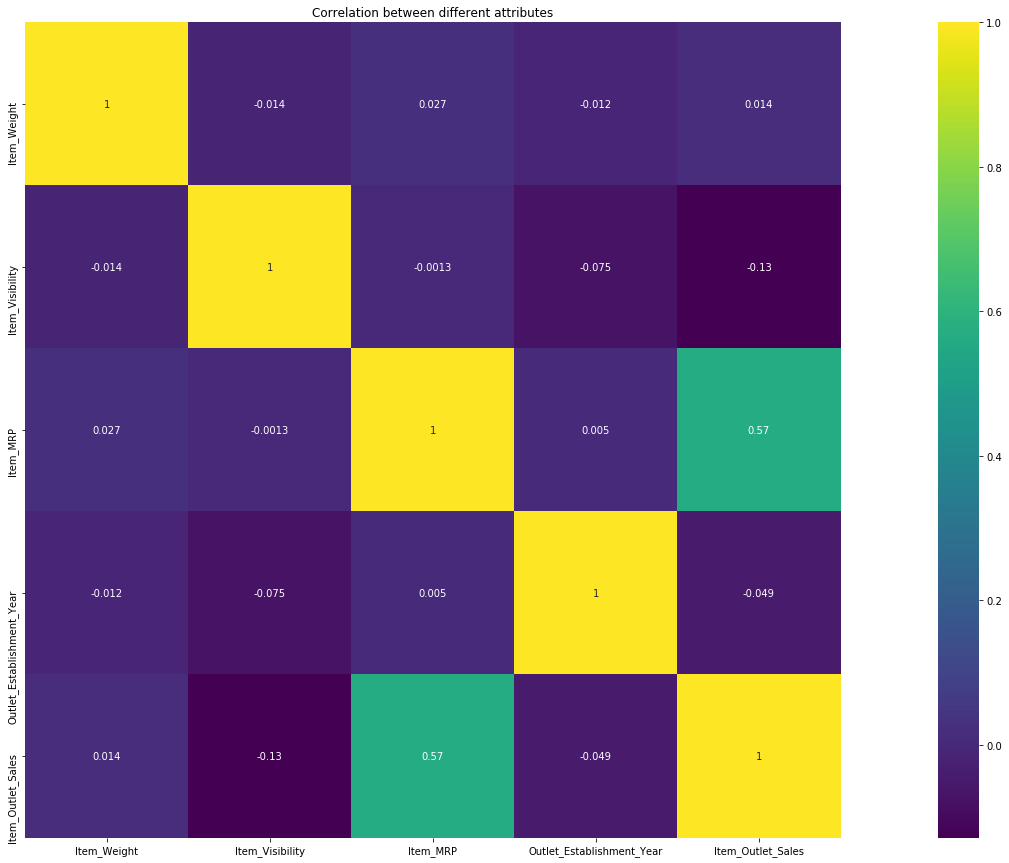

In [36]:
plt.figure(figsize=(35,15))
sns.heatmap(Train_data.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

# Feature Engineering and Transformation

## Treating the Missing Values

##### Item_Weight

From the boxplot we plotted at beginning, we noticed that the item_weight column is approximately Guassian(Normal Distribution) so it will be a good choice to replace the NaN with the mean of the column.

In [37]:
df['Item_Weight'].mean() #we will replace the NaN values with this mean

12.792854228644991

In [38]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace= True) ##missing is replaced by mean

##### Outlet_Size

We will be replacing the NaN values in the Outlet_Size column with Medium since we don't precisely know the outlet size, so we cannot say it is large or it is small, but Medium lies in between lage and small so it is ideal to consider it that way and also the model (i.e, outlet size that appears mostly) is Medium

In [39]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [40]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [41]:
df.isnull().sum() #now we dont have any null values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [42]:
 Train_data.shape

(8523, 13)

In [43]:
Test_data.shape

(5681, 12)

In [44]:
df.shape

(14204, 13)

As expected, the Item_Outlet_Sales will be having Null values. Don't forget we have concatenated the Train_data and Test_data and most importantly the Test_data does not have any column of Item_Outlet_Sales, it is only in tha Train_data. Also you can notice that our df is cosisting of 12 columns because our train data was having 12 columns But our test_data is having 11 columns so since it is not having the Item_Outlet_Sales, we expect it to be filled with NaN. Besides that is our target column so we need not to worry about it.

##### Item Visibility

The Item_Visibility had the minimum value 0 from our earlier descriptive statistics, but all the items needs to be visible to the customers. Meaning those items that were not available obviously did not have visibility and were captured as 0. This is an indication that we need to treat this as a missing value.

In [45]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [46]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace= True)

### Outlet Years

In [47]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [48]:
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

### Item Type

In [49]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

### The item types are either Food, Drinks or Non_Consumables.

In [50]:
df['Item_Identifier'].value_counts()

DRI11    10
FDL52    10
FDQ45    10
FDW26    10
DRB25    10
FDE02    10
NCC54    10
FDX26    10
FDX08    10
FDL45    10
FDM34    10
FDZ50    10
FDX50    10
FDC50    10
DRG49    10
FDH41    10
FDB03    10
FDZ36    10
FDU52    10
FDK56    10
FDI15    10
FDR14    10
FDJ57    10
DRH23    10
FDO56    10
NCH18    10
FDQ49    10
NCJ06    10
NCJ18    10
FDQ04    10
         ..
FDC23     8
FDN51     8
FDF12     8
FDI52     8
FDK60     8
FDL34     8
FDD35     8
FDS20     8
FDZ51     8
FDK10     8
NCN18     8
NCC19     8
FDJ04     8
FDB29     8
FDS35     8
FDZ03     8
FDP36     8
FDO33     7
NCW54     7
FDM52     7
FDM10     7
FDS22     7
FDX49     7
FDL50     7
FDI46     7
FDM50     7
NCL42     7
DRN11     7
FDR51     7
FDH58     7
Name: Item_Identifier, Length: 1559, dtype: int64



A closer look at each of the Item_Identifier shows that they either starts with either "FD" (Food), "DR" (Drinks) or "NC" (Non-Consumable) are 3 categories.


For us to do a better analysis, we will be creating 3 categories as pointed out instead of the already existing 16 categories

In [51]:
#Changing only the fist 2 characters (i.e, the category ID)
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [52]:
#Rename them to more intuitive categories:
df['New_Item_Type']= df['New_Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

<br>


**If a product is non-consumable then why associate a fat-content to them? We will get rid of this**

In [54]:
#Mark non-consumables as separate category in low_fat:
df.loc[df['New_Item_Type']=="Non-Consumable",'Item_Fat_Content']="Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

**Under normal circumstance, if a product is more visible, then its likely it will be getting higher sales. We can based on that hypothesis and create importance given to a product in a given store according to the mean of significance given to the same product in all other stores.**

In [57]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [58]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
DRB24,0.020596
DRB25,0.079407
DRB48,0.023973
DRC01,0.020653


In [67]:
function= lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index==x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function, axis=1).astype(float)

In [69]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,New_Item_Type,item_visib_avg
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,10,Food,0.931078
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0,Drinks,0.933420
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,10,Food,0.960069
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,11,Food,0.000000
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,22,Non-Consumable,0.000000


### Dealing with our Categorical Variables

#### Label Encoder

We will be converting all categorical variables into numeric types (Values of 0 or 1) using the label encoder function since we cannot build

In [72]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

#New Variable for Outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib= ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'New_Item_Type','Outlet_Type','Outlet']
for i in varib:
        df[i] = label.fit_transform(df[i])

In [73]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,New_Item_Type,item_visib_avg,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,10,1,0.931078,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0,0,0.933420,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,10,1,0.960069,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,2,1,0,train,11,1,0.000000,0
4,1,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,2,0,1,train,22,2,0.000000,1


Now we need to create dummy variables for these Label encoded variables in order to avoid our algorithm ranking

In [74]:
# Dummy Variables:
df= pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'New_Item_Type','Outlet_Type','Outlet'])
df.dtypes

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [75]:
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,train,22,...,0,1,0,0,0,0,0,0,0,0


# Model Building


In [79]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [80]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [81]:
train.drop(['source'],axis=1,inplace=True)

In [83]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [87]:
X_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
y_train=train['Item_Outlet_Sales']
X_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy() 

# Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [93]:
lr_pred=lr.predict(X_test)

In [95]:
lr_pred

array([1848., 1600., 1864., ..., 1824., 3584., 1264.])

In [96]:
lr_accuracy=round(lr.score(X_train,y_train)*100)
lr_accuracy

56.0

# DecisionTreeRegressor

In [97]:
from sklearn.tree import DecisionTreeRegressor 
tree=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)

In [98]:
tree_pred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [99]:
tree_accuracy=round(tree.score(X_train,y_train)*100)
tree_accuracy

62.0

# RandomForestRegressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_accuracy=round(rf.score(X_train,y_train)*100)
rf_accuracy

61.0

# XGBoost Regressor

In [112]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [113]:
y_pred=model.predict(X_test)
y_pred

array([1466.5479, 1350.2109,  630.7106, ..., 2057.4688, 4970.335 ,
       1451.6243], dtype=float32)

In [114]:
model.score(X_train,y_train)*100

88.38978930816562